In [1]:
import tensorflow as tf

In [2]:
data_dir = "/kaggle/input/digit-dataset/digit_dataset2"

In [3]:
batch_size = 32
image_size = (256, 256)
seed = 123

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=0.2,  # Reserve 20% for validation and test
    subset="training",
)

Found 2000 files belonging to 10 classes.
Using 1600 files for training.


In [5]:
validation_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

Found 2000 files belonging to 10 classes.
Using 400 files for validation.


In [6]:
val_size = len(validation_test_ds) // 2 
val_ds = validation_test_ds.take(val_size)  
test_ds = validation_test_ds.skip(val_size)

In [7]:
test_ds

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

In [9]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [10]:
# Prefetch to improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
from tensorflow.keras import layers, models

In [12]:
model = models.Sequential()

In [13]:
model.add(layers.InputLayer(input_shape=(256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(38, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,343,718 (256.90 MB)

 Trainable params: 67,343,718 (256.90 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    verbose=1,
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.1274 - loss: 3.4616 - val_accuracy: 0.5052 - val_loss: 1.7525
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.4145 - loss: 1.7802 - val_accuracy: 0.7292 - val_loss: 0.8684
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6670 - loss: 0.9568 - val_accuracy: 0.8594 - val_loss: 0.4903
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7802 - loss: 0.6343 - val_accuracy: 0.8646 - val_loss: 0.3543
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8618 - loss: 0.3889 - val_accuracy: 0.9167 - val_loss: 0.2012
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8969 - loss: 0.2853 - val_accuracy: 0.9375 - val_loss: 0.1993
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9338 - loss: 0.2019 - val_accuracy: 0.9688 - val_loss: 0.1315
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9308 - loss: 0.1783 - val_accuracy: 0.9792 -

In [17]:
import matplotlib.pyplot as plt

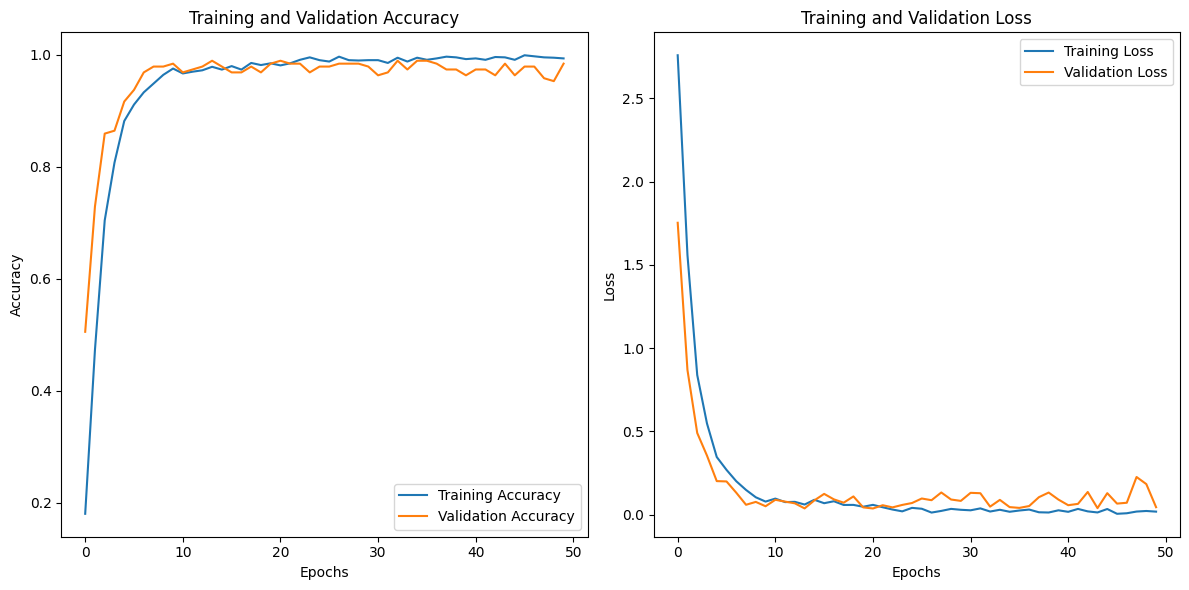

In [18]:
#  Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#  Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

In [20]:
image_path = "/kaggle/input/digit-dataset/digit_dataset2/0/digit_0_121.png"

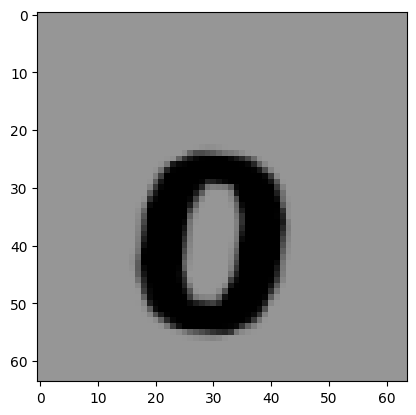

In [21]:
image = load_img(image_path)

# Display the image
plt.imshow(image)
plt.axis('on')
plt.show()

In [22]:
image = load_img(image_path, target_size=(256, 256))  
image_array = img_to_array(image)  
image_array = image_array / 255.0 
image_array = np.expand_dims(image_array, axis=0)

In [23]:
predictions = model.predict(image_array)
predicted_label = np.argmax(predictions[0]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


In [24]:
temp_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

Found 2000 files belonging to 10 classes.


In [25]:
class_names = temp_ds.class_names

In [26]:
predicted_class_name = class_names[predicted_label]

In [27]:
predicted_class_name

'0'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


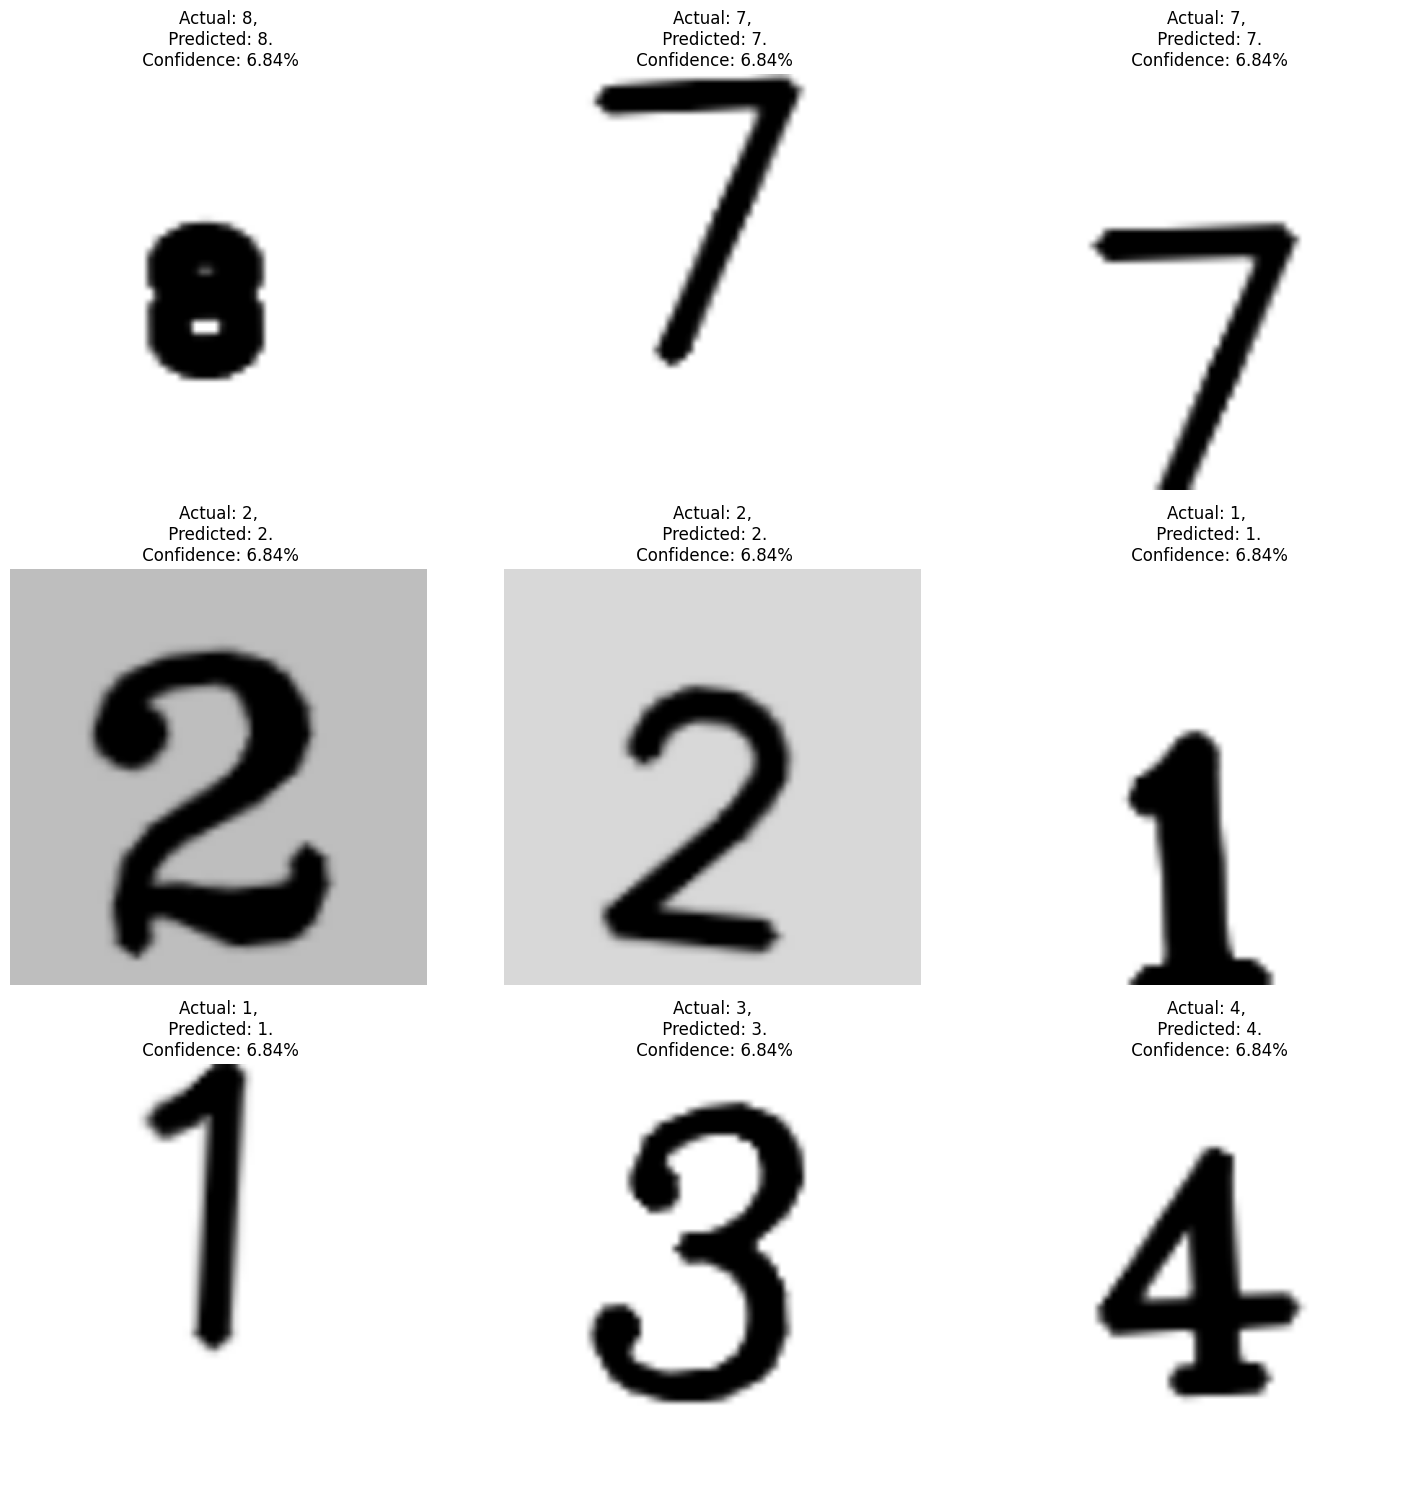

In [28]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        img = (images[i].numpy() * 255).astype("uint8")
        plt.imshow(img)

        prediction = model.predict(images[i:i+1])
        predicted_class = class_names[prediction.argmax()]
        confidence = 100 * tf.reduce_max(tf.nn.softmax(prediction))

        actual_class = class_names[labels[i].numpy()]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence:.2f}%")
        
        plt.axis("off")

plt.tight_layout()
plt.show()

In [30]:
model.save('/kaggle/working/digits_predict_model.h5')